In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import matplotlib.cm as cm
from matplotlib import font_manager as fm
import numpy as np
from datetime import timedelta
from IPython.display import display
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Settings to use for all plots
figsize = (12,8)
size = 300
secs = 3600
beams = ["Low", "Medium", "High"]

# Fonts to be used in plots
tfont = fm.FontProperties(family='STIXGeneral', weight='bold', size=30)
lfont = fm.FontProperties(family='STIXGeneral', math_fontfamily="stix", size=25, weight="bold")
tick_font = fm.FontProperties(family='STIXGeneral', math_fontfamily="stix", size=20)
bar_font = fm.FontProperties(family='STIXGeneral', math_fontfamily="stix", size=25)
legend_font = fm.FontProperties(family='STIXGeneral', math_fontfamily="stix", size=30)

## Load Data

In [3]:
data_files = []

for root, dirs, files in sorted(os.walk("./icpp_training_results")):
    if "stopping" in root:
        for i in files:
            f = os.path.join(root, i)
            data_files.append(f)

all_stopping = [pd.read_csv(data_files[3]), pd.read_csv(data_files[-1]), pd.read_csv(data_files[4]), pd.read_csv(data_files[-2]), pd.read_csv(data_files[5]), pd.read_csv(data_files[-3])]

./icpp_training_results/1gpu/no_stopping/1gpu_1e14_training_data.csv
./icpp_training_results/1gpu/no_stopping/1gpu_1e15_training_data.csv
./icpp_training_results/1gpu/no_stopping/1gpu_1e16_training_data.csv
./icpp_training_results/1gpu/stopping/1gpu_1e14_stopping_training_data.csv
./icpp_training_results/1gpu/stopping/1gpu_1e15_stopping_training_data.csv
./icpp_training_results/1gpu/stopping/1gpu_1e16_stopping_training_data.csv
./icpp_training_results/4gpu/no_stopping/4gpu_1e16_training_data.csv
./icpp_training_results/4gpu/no_stopping/4gpu_1e15_training_data.csv
./icpp_training_results/4gpu/no_stopping/4gpu_1e14_training_data.csv
./icpp_training_results/4gpu/stopping/4gpu_1e16_stopping_training_data.csv
./icpp_training_results/4gpu/stopping/4gpu_1e15_stopping_training_data.csv
./icpp_training_results/4gpu/stopping/4gpu_1e14_stopping_training_data.csv


## Figure 2 - Predicted Model Accuracy vs. Observed Accuracy

In [4]:
def get_epoch_converged(arch_df):
    sorted_by_epoch = arch_df.sort_values('epoch')
    try:
        converged = sorted_by_epoch[sorted_by_epoch.converged==True].iloc[0]
        return pd.Series({'epoch_converged': converged['epoch'], 'final_fitness': sorted_by_epoch['val_accs'].iloc[-1], 'prediction':converged['predictions']})
    except:
        return pd.Series({'epoch_converged': np.inf, 'final_fitness': sorted_by_epoch['val_accs'].iloc[-1], 'prediction':None})


In [5]:
# 1 GPU - 1e15 - No A4NN
df = pd.read_csv(data_files[1])

by_arch = df.groupby('arch')
where_converged = by_arch.apply(get_epoch_converged).reset_index()  

print("1 GPU - 1e15 - No A4NN")
print(where_converged.sort_values('epoch_converged', ascending=True).iloc[20:40])

percent_converged = len(where_converged[where_converged.epoch_converged!=np.inf].index) / len(where_converged.index) * 100
print("Percent Converged is: ", percent_converged)

mean = where_converged[where_converged.epoch_converged!=np.inf].epoch_converged.mean()
print("Avg epoch converged (for those converged) is: ", mean)

print("converged arches and their earliest convergence:")
only_converged_arches = pd.DataFrame(where_converged.loc[where_converged.epoch_converged!=np.inf,:])
only_converged_arches.head()

1 GPU - 1e15 - No A4NN
    arch  epoch_converged  final_fitness  prediction
9      9              9.0      99.987402   97.726776
33    33              9.0      99.981104   96.749503
82    82              9.0      98.904006   89.177712
98    98              9.0      97.442681   89.334014
61    61              9.0      99.483497   94.791125
55    55             10.0      99.930713   97.606809
58    58             10.0      97.952885   92.716285
6      6             10.0      99.911817   99.324454
37    37             10.0      99.533888   95.852044
38    38             11.0      99.943311   99.614529
7      7             11.0      97.864701   93.434028
83    83             11.0      99.943311   98.963262
64    64             11.0      98.929201   88.219842
54    54             11.0      99.111867   92.787099
91    91             11.0      99.905518   98.770422
51    51             11.0      98.563870   93.837877
88    88             11.0      98.664651   91.570552
2      2             11

,arch,epoch_converged,final_fitness,prediction
0,0,24.0,99.281935,99.788292
1,1,16.0,99.559083,94.197689
2,2,11.0,99.918115,98.678220
6,6,10.0,99.911817,99.324454
7,7,11.0,97.864701,93.434028


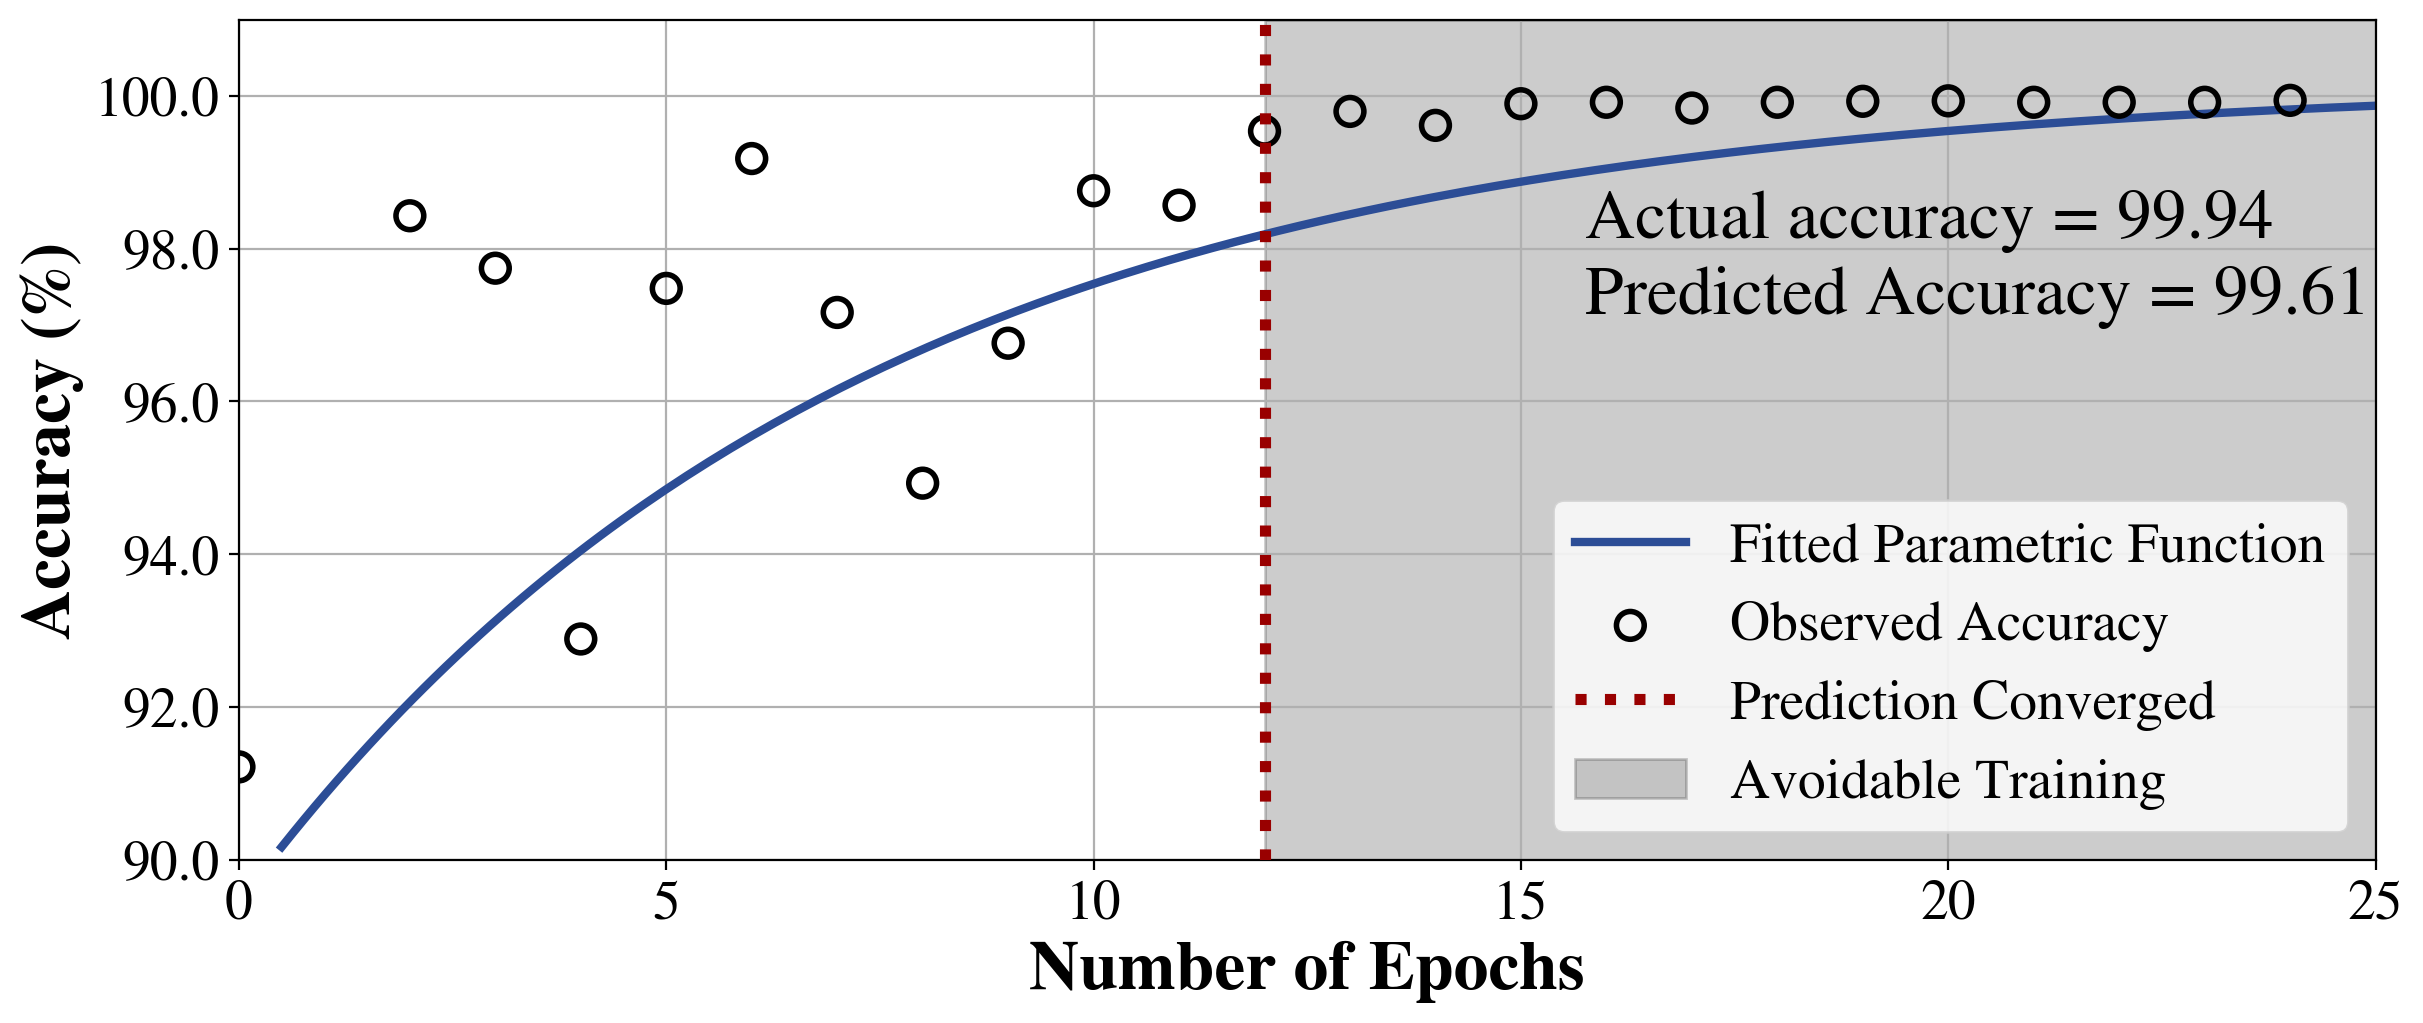

In [6]:
arch_44 = df[df['arch']==38]
fig, ax = plt.subplots(layout='constrained', figsize=(12,5), dpi=200)

a, b, c = 100.2, 1.15, 17

x = np.linspace(0.5,26,200)
y = a-b**(c-x)

epochs, fitness = arch_44['epoch'].to_list(), arch_44['val_accs'].to_list()
prediction, actual = 99.614529, 99.943311

ax.plot(x,y,color="#2C4D96", label="Fitted Parametric Function", linewidth=3)

ax.scatter(epochs, fitness,  marker='o', edgecolors='black', facecolor="none",linewidths=2, s= 100, label='Observed Accuracy', zorder=3)
ax.vlines(12,90,101,colors='#990000',linestyles=":",linewidth=4, label="Prediction Converged", zorder=3)
ax.axvspan(12, 26, color = 'k', alpha = 0.2, label="Avoidable Training")

text_font = fm.FontProperties(family='STIXGeneral', math_fontfamily="stix", size=25)
ax.annotate('Predicted Accuracy = {:.2f}'.format(prediction), xy=(0.63, 0.65), xycoords='axes fraction', font=text_font, zorder=3)
ax.annotate('Actual accuracy = {:.2f}'.format(actual), xy=(0.63, 0.74), xycoords='axes fraction', font=text_font, zorder=3)

ax.set_ylim(90, 101)
ax.set_xlim(0, 25)
ax.grid(zorder=-1)
ax.set_ylabel("Accuracy (%)", font=lfont)
ax.set_xlabel("Number of Epochs", font=lfont)
xticks_labels = ['0', '5', '10', '15', '20', '25']
ax.set_xticklabels(xticks_labels, color= "black" , font=tick_font)
ax.set_yticklabels(ax.get_yticks(), color= "black" , font=tick_font)
ax.legend(loc='lower right', prop=tick_font)

plt.savefig('figures/figure2.png', bbox_inches='tight')


## Figure 5 - Single GPU Pareto Optimal Architectures 

In [7]:
def one_line_per_arch_a4nn(arch_df):
    sorted_by_epoch = arch_df.sort_values('epoch', ascending=False)
    if sorted_by_epoch['converged'].iloc[0] == True:
        to_return = sorted_by_epoch['predictions'].iloc[0]
    else:
        to_return = sorted_by_epoch['val_accs'].iloc[0]
    return pd.Series({'final_acc':to_return, 'flops':arch_df['flops'].iloc[0], 'converged':sorted_by_epoch['converged'].iloc[0]})

def one_line_per_arch(arch_df):
    sorted_by_epoch = arch_df.sort_values('epoch', ascending=False)
    to_return = sorted_by_epoch['val_accs'].iloc[0]
    return pd.Series({'final_acc':to_return, 'flops':arch_df['flops'].iloc[0], 'converged':sorted_by_epoch['converged'].iloc[0]})

def is_pareto_efficient_simple(unadjusted_costs):
    """
    Find the pareto-efficient points
    :param costs: An (n_points, n_costs) array
    :return: A (n_points, ) boolean array, indicating whether each point is Pareto efficient
    """

    # this assumes minimization
    costs = np.zeros(unadjusted_costs.shape, dtype=float)
    costs[:,1] = unadjusted_costs[:,1]
    costs[:,0] = unadjusted_costs[:,0] * -1
    
    is_efficient = np.ones(costs.shape[0], dtype = bool)
    for i, c in enumerate(costs):
        if is_efficient[i]:
            is_efficient[is_efficient] = np.any(costs[is_efficient]<c, axis=1)  # Keep any point with a lower cost
            is_efficient[i] = True 
    return is_efficient

In [8]:
all_paretos = pd.DataFrame()
for i in data_files:  
    df = pd.read_csv(i)
    by_arch = df.groupby('arch')

    if "1e14" in i:
        beam = "Low"
    elif "1e15" in i:
        beam = "Medium"
    elif "1e16" in i:  
        beam = "High"    

    if "no" in i:  
        stop = False
        one_line = by_arch.apply(one_line_per_arch).sort_values('arch', ascending=True).reset_index()  
    elif "stopping" in i:  
        stop = True  
        one_line = by_arch.apply(one_line_per_arch_a4nn).sort_values('arch', ascending=True).reset_index()

    if "1gpu" in i:  
        gpu = 1  
    elif "4gpu" in i:  
        gpu = 4  

    print(one_line.head)
    sorted_by_fitness = one_line.sort_values('final_acc', ascending=False).head()
    costs = one_line[['final_acc', 'flops']].to_numpy()
    pareto_optimals = is_pareto_efficient_simple(costs) 
    one_line['pareto_optimal'] = pareto_optimals
    pareto_optimal_arches = one_line.loc[one_line['pareto_optimal'] == True].copy()

    pareto_optimal_arches['beam'] = beam
    pareto_optimal_arches['gpus'] = gpu
    pareto_optimal_arches['stop'] = stop

    all_paretos = pd.concat([all_paretos, pareto_optimal_arches], ignore_index=True)


<bound method NDFrame.head of     arch  final_acc     flops  converged
0      0  94.053918  740.0186       True
1      1  95.616024  893.3620      False
2      2  97.996977  993.3537       True
3      3  94.375157  731.0186       True
4      4  98.015873  917.7927      False
..   ...        ...       ...        ...
95    95  97.707231  695.5480       True
96    96  98.293021  712.9844      False
97    97  98.293021  677.2712      False
98    98  97.763920  597.5721       True
99    99  92.233560  450.7927       True

[100 rows x 4 columns]>
<bound method NDFrame.head of     arch  final_acc     flops  converged
0      0  99.281935  740.0186       True
1      1  99.559083  893.3620       True
2      2  99.918115  993.3537       True
3      3  99.685059  731.0186      False
4      4  99.905518  917.7927      False
..   ...        ...       ...        ...
95    95  99.074074  740.0186      False
96    96  98.412698  597.3296       True
97    97  99.981104  904.2344       True
98    98  97.

#### Figure 5a - 1 GPU With A4NN Workflow

(-55.894965000000006, 1173.794265)


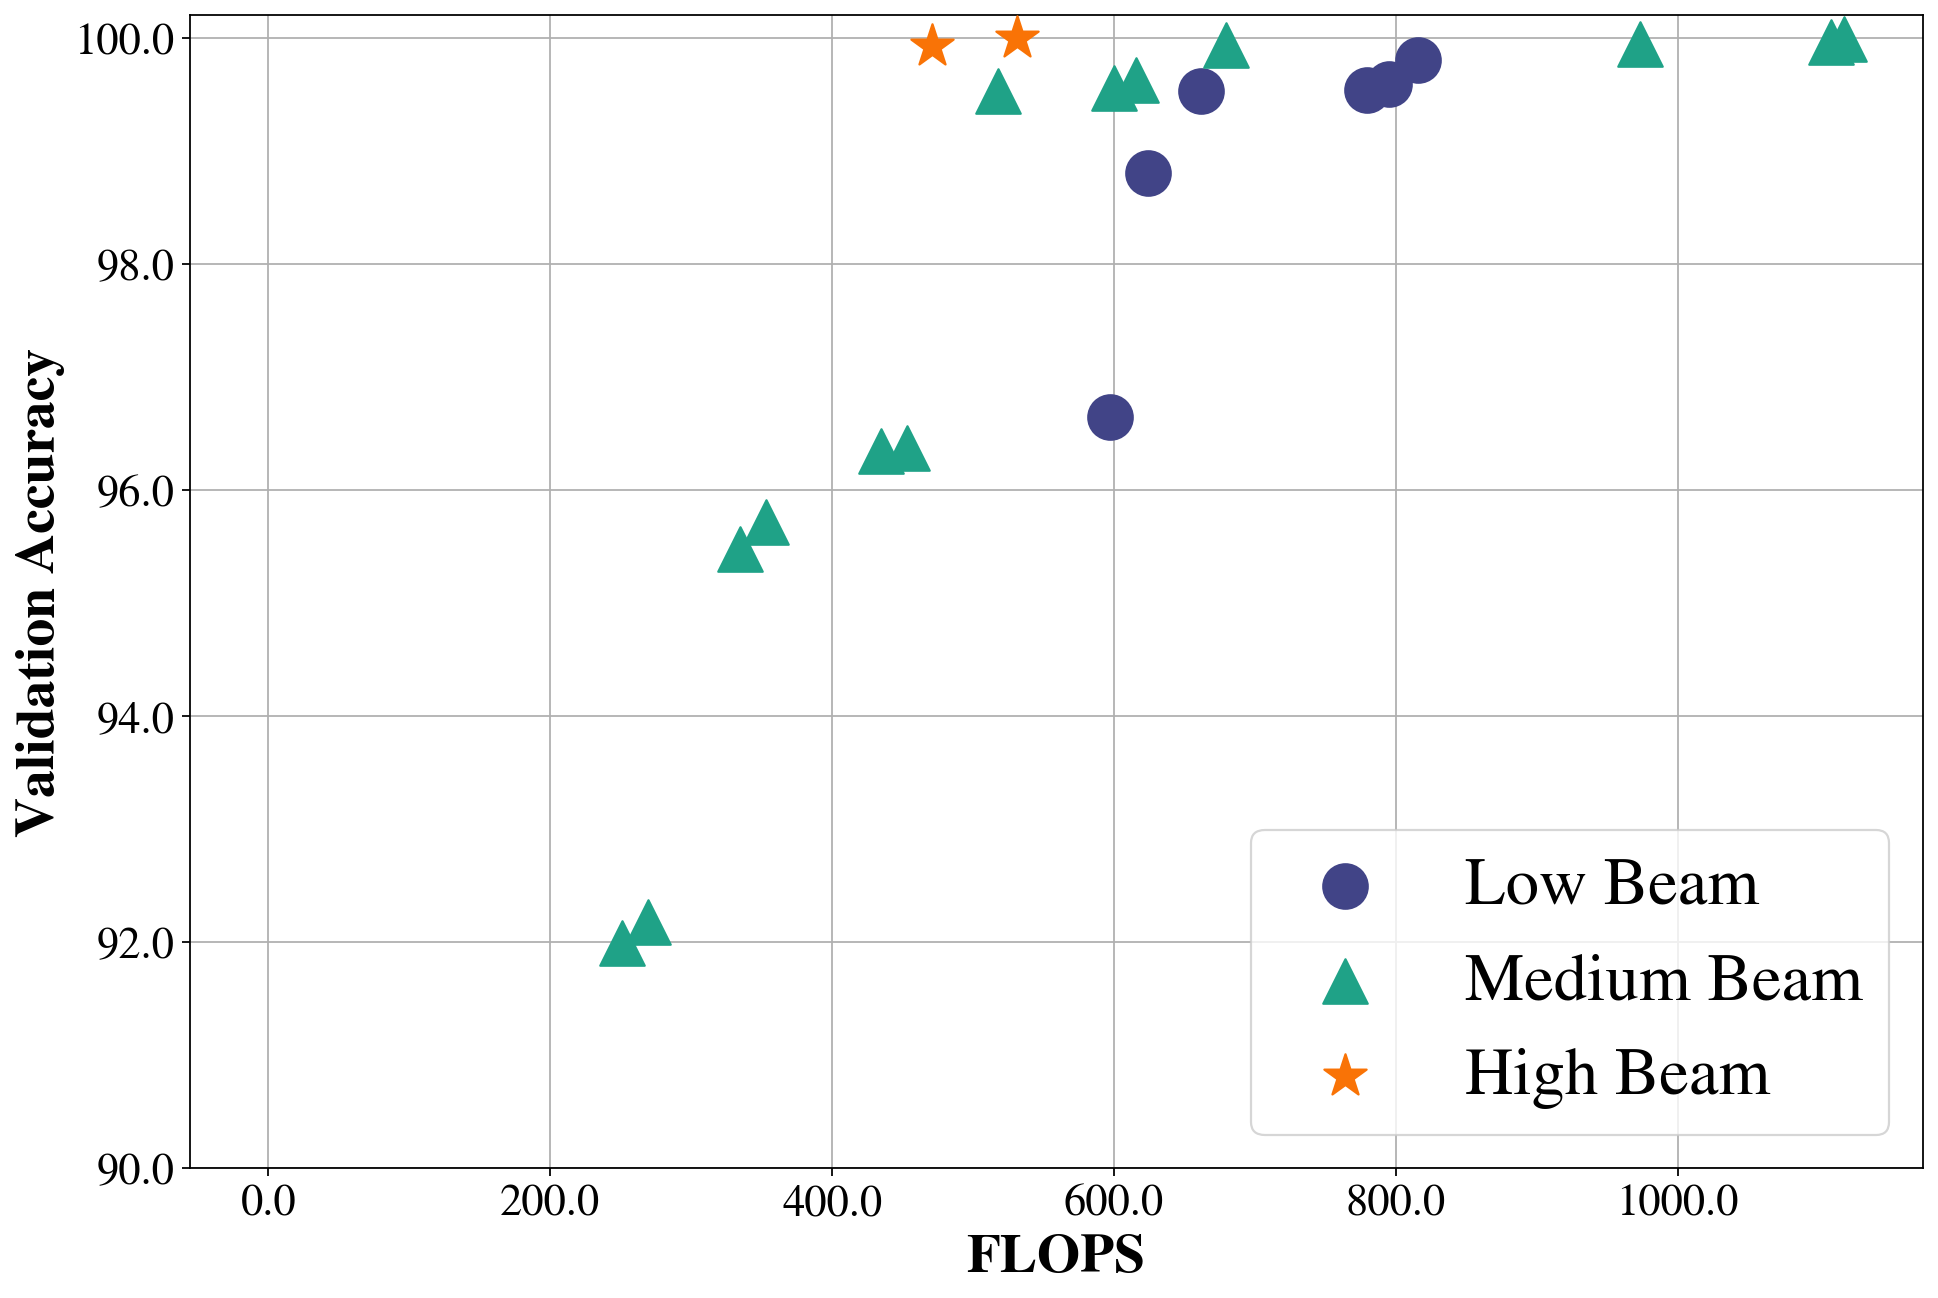

In [9]:
# 1 GPU - with A4NN
df = all_paretos.copy()
fig, ax = plt.subplots(layout='constrained', figsize=figsize, dpi=160)

plt.xlabel('FLOPS', color='black', font=lfont)
plt.ylabel('Validation Accuracy', color='black', font=lfont)
plt.ylim(90, 100.2)

markers = ["o", "^"]
size=400

low, medium, high = (df['beam'] == "Low"), (df['beam'] == "Medium"), (df['beam'] == "High")
gpu1, gpu4 = (df['gpus'] == 1), (df['gpus'] == 4)
no_stop, stop = (df['stop'] == False), (df['stop'] == True)

low_peng_acc = df.loc[low & gpu1 & stop]['final_acc'].to_numpy()
low_peng_flops = df.loc[low & gpu1 & stop]['flops'].to_numpy()

med_peng_acc = df.loc[medium & gpu1 & stop]['final_acc'].to_numpy()
med_peng_flops = df.loc[medium & gpu1 & stop]['flops'].to_numpy()

high_peng_acc = df.loc[high & gpu1 & stop]['final_acc'].to_numpy()
high_peng_flops = df.loc[high & gpu1 & stop]['flops'].to_numpy()

colors = cm.viridis(np.linspace(0.2, 0.95, 3))
l2 = ax.scatter(low_peng_flops, low_peng_acc,  s=size, marker= "o" , color=colors[0], zorder=3)
l4 = ax.scatter(med_peng_flops, med_peng_acc, s=size, marker= "^" , color=colors[1], zorder=3)
l6 = ax.scatter(high_peng_flops, high_peng_acc, s=size, marker= "*" , color="xkcd:orange", zorder=3)
l7 = ax.scatter([0], [0], s=size, marker='o', color= colors[0] , label= "Low Beam" )
l8 = ax.scatter([0], [0], s=size, marker='^', color= colors[1] , label= "Medium Beam" )
l9 = ax.scatter([0], [0], s=size, marker="*", color= "xkcd:orange", label="High Beam")
ax.grid(zorder=-1)

print(ax.get_xlim())

ax.set_xticklabels(ax.get_xticks(), color= "black" , font=tick_font)
ax.set_yticklabels(ax.get_yticks(), color= "black" , font=tick_font)
ax.legend(handles=[l7, l8, l9], loc= "lower right" , prop=legend_font)

ax.set_xticklabels(ax.get_xticks(), color= "black" , font=tick_font)
ax.set_yticklabels(ax.get_yticks(), color= "black" , font=tick_font)
plt.savefig('figures/figure5a.png')

#### Figure 5b -1 GPU with NSGA-Net Only

['#440154', '#21918c', '#fde725']


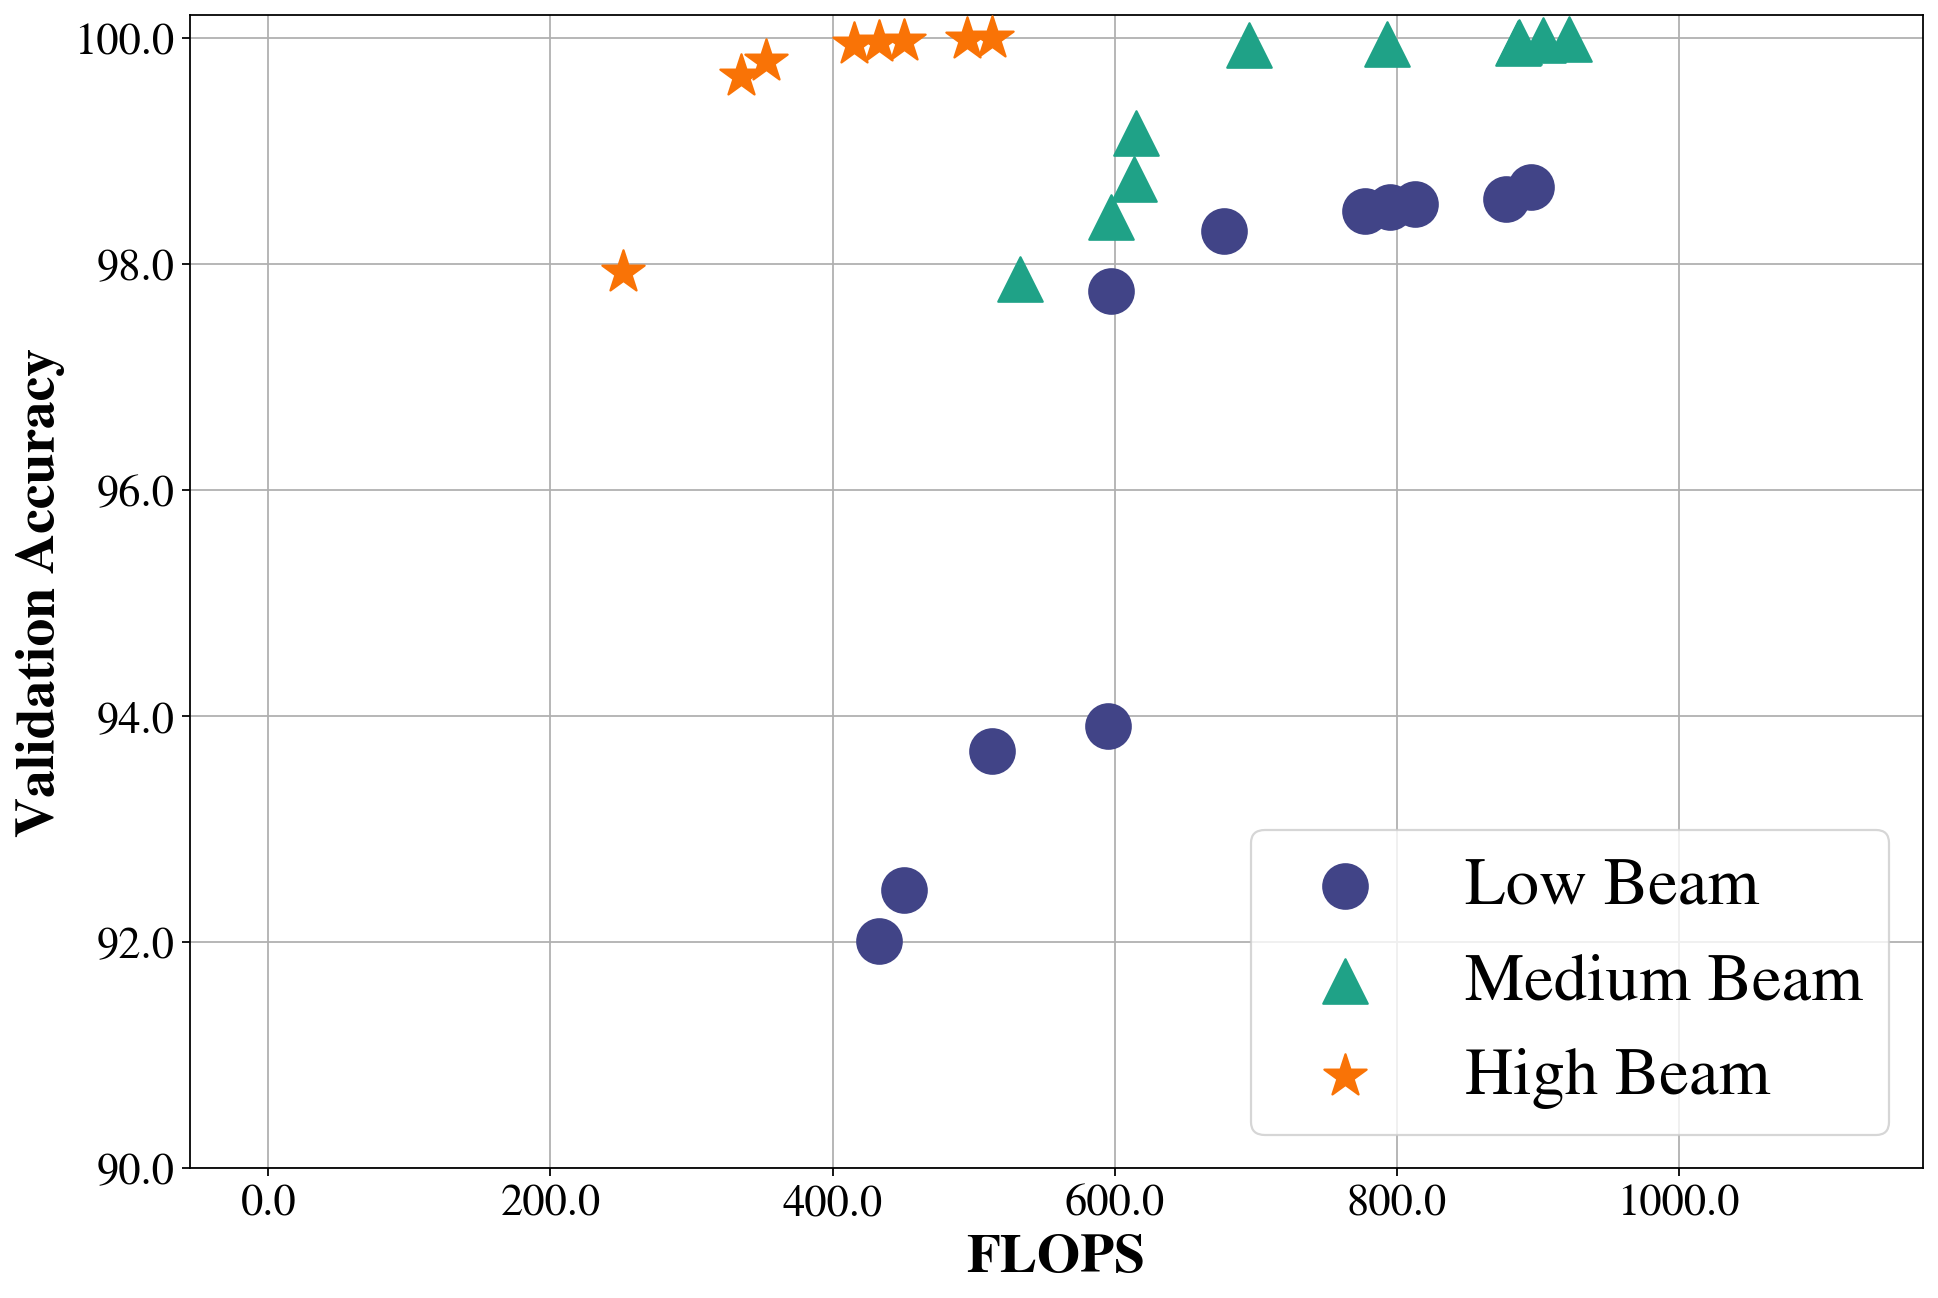

In [10]:
# 1 GPU - without A4NN
fig, ax = plt.subplots(layout='constrained', figsize=figsize, dpi=160)

plt.xlabel('FLOPS', color='black', font=lfont)
plt.ylabel('Validation Accuracy', color='black', font=lfont)
plt.ylim(90, 100.2)

markers = ["o", "^"]

low, medium, high = (df['beam'] == "Low"), (df['beam'] == "Medium"), (df['beam'] == "High")
gpu1, gpu4 = (df['gpus'] == 1), (df['gpus'] == 4)
no_stop, stop = (df['stop'] == False), (df['stop'] == True)

low_acc = df.loc[low & gpu1 & no_stop]['final_acc'].to_numpy()
low_flops = df.loc[low & gpu1 & no_stop]['flops'].to_numpy()

med_acc = df.loc[medium & gpu1 & no_stop]['final_acc'].to_numpy()
med_flops = df.loc[medium & gpu1 & no_stop]['flops'].to_numpy()

high_acc = df.loc[high & gpu1 & no_stop]['final_acc'].to_numpy()
high_flops = df.loc[high & gpu1 & no_stop]['flops'].to_numpy()

size=400
colors = cm.viridis(np.linspace(0.2, 0.95, 3))
cmap = cm.get_cmap('viridis', 3)
import matplotlib
converted = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
print(converted)
l1 = ax.scatter(low_flops, low_acc, marker= "o" , s=size, color=colors[0], label= "Low Beam", zorder=3)
l3 = ax.scatter(med_flops, med_acc, marker= "^" , s=size, color=colors[1], label= "Medium Beam", zorder=3)
l5 = ax.scatter(high_flops, high_acc, s=size, marker= "*" , color="xkcd:orange", label= "High Beam", zorder=3)
l7 = ax.scatter([0], [0], s=size, marker='o', color= colors[0] , label= "Low Beam" )
l8 = ax.scatter([0], [0], s=size, marker='^', color= colors[1] , label= "Medium Beam" )
l9 = ax.scatter([0], [0], s=size, marker="*", color= "xkcd:orange", label="High Beam")

ax.grid(zorder=-1)
ax.set_xlim((-55.89, 1173))
ax.set_xticklabels(ax.get_xticks(), color= "black" , font=tick_font)
ax.set_yticklabels(ax.get_yticks(), color= "black" , font=tick_font)
ax.legend(handles=[l7, l8, l9], loc= "lower right" , prop=legend_font)

ax.set_xticklabels(ax.get_xticks(), color= "black" , font=tick_font)
ax.set_yticklabels(ax.get_yticks(), color= "black" , font=tick_font)
plt.savefig('figures/figure5b.png')

## Figure 6 - Epoch Savings


Avg. epochs completed for Low: 2134.0
Avg. percent epochs saved for Low: 14.639999999999997

Avg. epochs completed for Medium: 1573.0
Avg. percent epochs saved for Medium: 37.08

Avg. epochs completed for High: 1688.0
Avg. percent epochs saved for High: 32.48



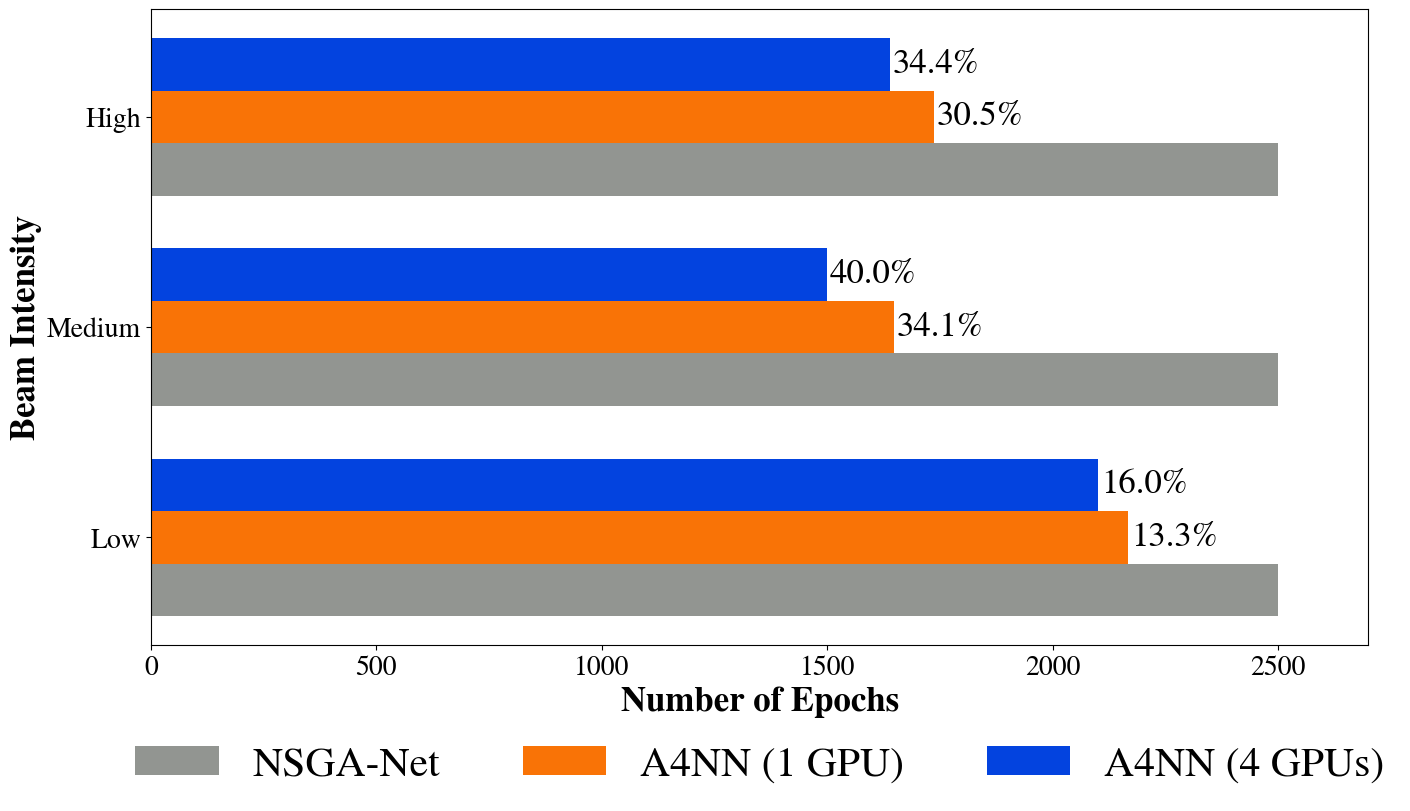

In [11]:
def plot_epochs_savings(beams, num_epochs_no_stop, stop_1e14, stop_1e15, stop_1e16):
    epochs_run = {
        'NSGA-Net': np.repeat(num_epochs_no_stop, 3),
        'A4NN (1 GPU)': (stop_1e14[0], stop_1e15[0], stop_1e16[0]),
        'A4NN (4 GPUs)': (stop_1e14[1], stop_1e15[1], stop_1e16[1]),
    }

    x = np.arange(len(beams))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(14, 8))
    colors = ["xkcd:grey", "xkcd:orange", "xkcd:blue"]
    bar_font = fm.FontProperties(family='STIXGeneral', math_fontfamily="stix", size=25)
    for index, (label, num_epochs) in enumerate(epochs_run.items()):
        offset = width * multiplier
        rects = ax.barh(x + offset, num_epochs, width, label=label, color=colors[index]) 
    
        labels = [str(round((1-(num_epochs[i]/num_epochs_no_stop))*100, 1))+'%' for i in range(len(num_epochs))]
        if any(float(i.split('%')[0].strip()) > 0.0  for i in labels):
            ax.bar_label(rects, labels=labels, padding=2, font=bar_font)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Number of Epochs', font=lfont)
    ax.xaxis.label.set_color('black')
    ax.set_ylabel('Beam Intensity', font=lfont)
    ax.yaxis.label.set_color('black')
    ax.set_xlim(0, 2700)

    ax.set_yticks(x + width, beams)
    xticks = [int(x) for x in ax.get_xticks()]
    ax.set_xticklabels(xticks, color='black', font=tick_font)
    ax.set_yticklabels(beams, color='black', font=tick_font)

    handles, labels = plt.gca().get_legend_handles_labels()
    order = [0, 1, 2]

    ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="upper center", bbox_to_anchor=(0.5, -0.1),  ncol=3, prop=legend_font, frameon=False)

    plt.savefig('figures/figure6.png')
    display(fig)
    plt.close()
    return

def calculate_and_plot_epochs_savings(files):
    no_stop_1e14, no_stop_1e15, no_stop_1e16 = [], [], []
    stop_1e14, stop_1e15, stop_1e16 = [], [], []
    stop_1e14_len, stop_1e15_len, stop_1e16_len = [], [], []
   
    for f in files: 
        if "no" in f:
            df = pd.read_csv(f)
            num_epochs_no_stopping = len(df.index) # non-stopped file

            if "1e14" in f:
                no_stop_1e14.append(df) 
            elif "1e15" in f:
                no_stop_1e15.append(df)
            elif "1e16" in f:
                no_stop_1e16.append(df)

        beam = f.split('/')[-1].split('_')[1].strip()
        gpus = f.split('/')[-1].split('_')[0].strip()
        stop = f.split('/')[-1].strip()
        if "stopping" in stop:
            df = pd.read_csv(f)

            if "1e14" in stop:
                stop_1e14.append(df) 
                stop_1e14_len.append(len(df.index))
            elif "1e15" in stop:
                stop_1e15.append(df) 
                stop_1e15_len.append(len(df.index))
            elif "1e16" in stop:
                stop_1e16.append(df) 
                stop_1e16_len.append(len(df.index))

    print()
    avg_epochs_completed = [sum(stop_1e14_len)/len(stop_1e14_len), sum(stop_1e15_len)/len(stop_1e15_len), sum(stop_1e16_len)/len(stop_1e16_len)]
    for i, b in enumerate(beams):
        print(f"Avg. epochs completed for {b}: {avg_epochs_completed[i]}")
        percent_epochs_saved = 1-(avg_epochs_completed[i]/num_epochs_no_stopping)
        print(f"Avg. percent epochs saved for {b}: {percent_epochs_saved*100}\n")

    plot_epochs_savings(beams, num_epochs_no_stopping, stop_1e14_len, stop_1e15_len, stop_1e16_len)

    return [no_stop_1e14, no_stop_1e15, no_stop_1e16], [stop_1e14, stop_1e15, stop_1e16]

no_stop, stop = calculate_and_plot_epochs_savings(data_files)

## Figure 7 - Violin Plot of Convergence

percent converged is: 61.0
percent converged is: 67.0
percent converged is: 69.0
percent converged is: 80.0
percent converged is: 56.00000000000001
percent converged is: 57.99999999999999


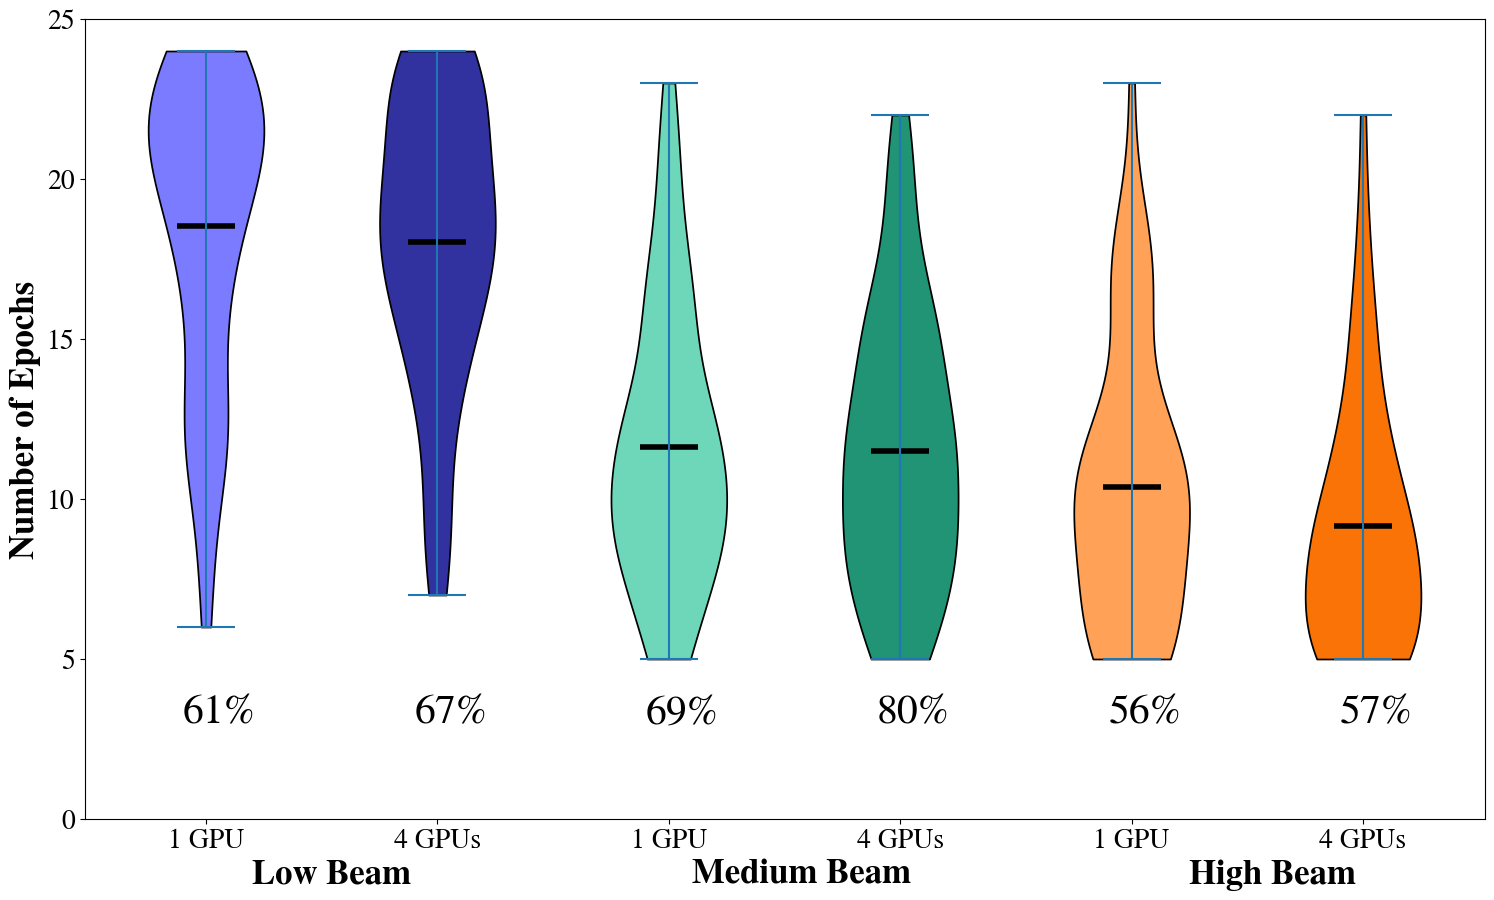

In [12]:
sets = list()
percents = list()

for df in all_stopping:
    by_arch = df.groupby('arch')
    where_converged = by_arch.apply(get_epoch_converged).reset_index()
    only_converged_arches = pd.DataFrame(where_converged.loc[where_converged.epoch_converged!=np.inf,:])
    sets.append(only_converged_arches.epoch_converged.to_list())
    

    percent_converged = len(where_converged[where_converged.epoch_converged!=np.inf].index) / len(where_converged.index) * 100
    percents.append(percent_converged)
    print("percent converged is:", percent_converged)

data_to_plot = sets

fig, ax = plt.subplots(layout='constrained', figsize=(14,8))
colors = cm.viridis(np.linspace(0.2, 0.95, 6))

ax = fig.add_axes([0,0,1,1])

ax.set_ylim(0, 25)
ax.set_xticklabels(['', '1 GPU', '4 GPUs', '1 GPU', '4 GPUs', '1 GPU', '4 GPUs'], font=tick_font)
ax.set_yticklabels([str(int(i))for i in ax.get_yticks()], font=tick_font)
ax.set_ylabel('Number of Epochs', font=lfont)


bp = ax.violinplot(data_to_plot, showmeans=True)
colors=["#7B7BFF", "#3231A0", "#6ED7BA", "#209474", "#ffa257", "xkcd:orange"]

bp['cmeans'].set_color('black')
bp['cmeans'].set_linewidth(4)

for pc, color, percent in zip(bp['bodies'], colors, percents):
    pc.set_facecolor(color)
    pc.set_edgecolor('black')
    pc.set_linewidth(1.25)
    pc.set_label(str(int(percent))+'%')
    pc.set_alpha(1)

bp['bodies'][0].set_edgecolor('black')

lower = ["Low Beam", "Medium Beam", "High Beam"]
for i, p in enumerate(percents):
    ax.text(x=i + 0.9, y=3, s=str(int(p))+'%', font=legend_font)

ax.text(x=1.2, y=-2, s=lower[0], font=lfont)
ax.text(x=3.1, y=-2, s=lower[1], font=lfont)
ax.text(x=5.25, y=-2, s=lower[2], font=lfont)

plt.savefig('figures/figure7.png', bbox_inches='tight')


## Figure 8 - Time Savings

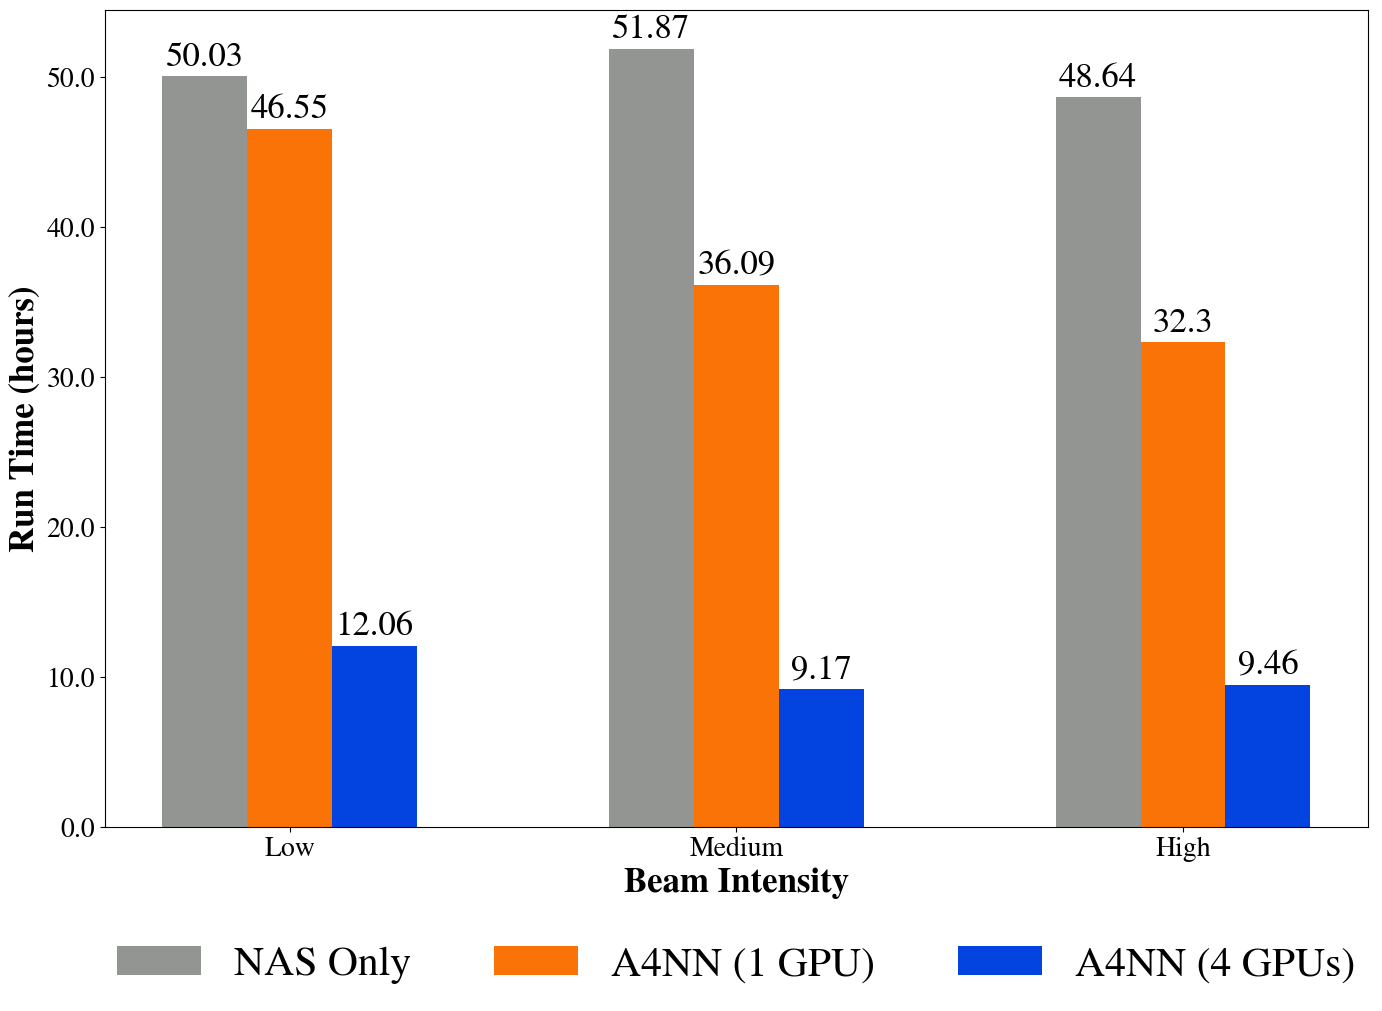

In [13]:
def get_run_time(row):
    days = int(row.split('-')[0])
    hours = int(row.split('-')[1].split('_')[0])
    minutes = int(row.split('-')[1].split('_')[1])
    seconds = int(row.split('-')[1].split('_')[2])
    time = timedelta(days=days, hours=hours, minutes=minutes, seconds=seconds)
    return time

def get_run_seconds(row):
    days = int(row.split('-')[0])
    hours = int(row.split('-')[1].split('_')[0])
    minutes = int(row.split('-')[1].split('_')[1])
    seconds = int(row.split('-')[1].split('_')[2])
    time = timedelta(days=days, hours=hours, minutes=minutes, seconds=seconds)
    return time.total_seconds()

def plot_times():
    time_df = pd.read_csv('./icpp_training_results/time_to_run.csv')

    # DataFrame filtering conditions
    b14, b15, b16 = (time_df['dataset']==14), (time_df['dataset']==15), (time_df['dataset']==16)
    no_stop, stop = (time_df['stopping']==False), (time_df['stopping']==True)
    gpu1, gpu4 = (time_df['gpu']==1), (time_df['gpu']==4)
    time_format = 'total_seconds'

    # Filtering data
    no_stop_1e14 = np.array([time_df[b14 & no_stop & gpu1][time_format].item(), time_df[b14 & no_stop & gpu4][time_format].item()])/secs
    no_stop_1e15 = np.array([time_df[b15 & no_stop & gpu1][time_format].item(), time_df[b15 & no_stop & gpu4][time_format].item()])/secs
    no_stop_1e16 = np.array([time_df[b16 & no_stop & gpu1][time_format].item(), time_df[b16 & no_stop & gpu4][time_format].item()])/secs

    stop_1e14 = np.array([time_df[b14 & stop & gpu1][time_format].item(), time_df[b14 & stop & gpu4][time_format].item()])/secs
    stop_1e15 = np.array([time_df[b15 & stop & gpu1][time_format].item(), time_df[b15 & stop & gpu4][time_format].item()])/secs
    stop_1e16 = np.array([time_df[b16 & stop & gpu1][time_format].item(), time_df[b16 & stop & gpu4][time_format].item()])/secs

    epochs_run = {
        'NAS Only': (no_stop_1e14[0], no_stop_1e15[0], no_stop_1e16[0]),
        'A4NN (1 GPU)': (stop_1e14[0], stop_1e15[0], stop_1e16[0]),
        'A4NN (4 GPUs)': (stop_1e14[1], stop_1e15[1], stop_1e16[1]),
    }

    x = np.arange(len(beams))  # the label locations
    width = 0.19  # the width of the bars
    multiplier = 0

    fig, ax = plt.subplots(layout='constrained', figsize=(14,10))
    colors = ["xkcd:grey", "xkcd:orange", "xkcd:blue"]

    for index, (label, times) in enumerate(epochs_run.items()):
        offset = width * multiplier
        rects = ax.bar(x + offset, times, width, label=label, color=colors[index]) 
        labels = [round(time, 2) for time in times]
        ax.bar_label(rects, labels=labels ,padding=2, font=bar_font)
        multiplier += 1

    # Labels, title, x-axis tick labels, etc.
    ax.set_ylabel('Run Time (hours)', font=lfont)
    ax.xaxis.label.set_color('black')
    ax.set_xlabel('Beam Intensity', font=lfont)
    ax.yaxis.label.set_color('black')

    ax.set_xticks(x + width, beams)
    ax.set_xticklabels(beams, color='black', font=tick_font)
    ax.set_yticklabels(ax.get_yticks(), color='black', font=tick_font)

    ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1),  ncol=4, prop=legend_font, frameon=False)
    display(fig)
    plt.savefig('figures/figure8.png')
    plt.close()
    
    return

def save_and_plot_times():
    gpu=[1,1,1,1,1,1,4,4,4,4,4,4]
    stopping=[False, False, False, True, True, True, False, False, False, True, True, True]
    dataset=['14','15','16','14','15','16','14','15','16','14','15','16']
    time=['2-02_01_42','2-03_52_23','2-00_38_20','1-22_33_04','1-12_05_38','1-08_18_16','0-14_32_18','0-14_54_32','0-13_53_12','0-12_03_46','0-09_10_05','0-09_27_38']

    time_df = pd.DataFrame()
    time_df['gpu'] = gpu
    time_df['dataset'] = dataset
    time_df['stopping'] = stopping
    time_df['time'] = time
    time_df['total_time'] = time_df['time'].apply(get_run_time)
    time_df['total_seconds'] = time_df['time'].apply(get_run_seconds)

    time_df.to_csv('./icpp_training_results/time_to_run.csv', index=False)
    plot_times()
    return 

save_and_plot_times()